In [16]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt


In [13]:
# This is the output of ti.samples_summary()

df_daily = pd.read_csv("../data/daily_stats.csv")
df_daily

,date,exact_matches,mean_hmm_cost,median_hmm_cost,rejected,scorpio,total,total_hmm_cost,inserted
0,2020-01-01,0,24.00,24.0,1,.,1,24.0,0
1,2020-01-10,0,15.00,15.0,1,.,1,15.0,0
2,2020-01-19,0,3.00,3.0,0,.,1,3.0,1
3,2020-01-24,0,1.00,1.0,0,.,2,2.0,2
4,2020-01-25,2,1.00,1.0,0,.,4,4.0,2
...,...,...,...,...,...,...,...,...,...
6378,2023-02-20,4,3.18,1.0,1,Omicron (BA.2-like),11,35.0,6
6379,2023-02-20,5,1.11,0.0,0,Omicron (XBB.1.5-like),9,10.0,4
6380,2023-02-20,0,2.20,1.0,0,Omicron (XBB.1-like),5,11.0,5
6381,2023-02-20,0,2.33,1.0,1,Omicron (BA.5-like),6,14.0,5


In [45]:
df_recomb = pd.read_csv("../data/recombinants.csv", parse_dates=["date_added"])
df_recomb

,recombinant,descendants,sample,sample_id,sample_pango,interval_left,interval_right,num_mutations,date_added,group_id,...,max_run_length,max_runlength_3sep,likely_artifactual,k4_num_mutations,k1000_num_mutations,num_mutations_averted,Viridian_amplicon_scheme,Platform,Artic_primer_version,break_near_missing_run_12_7
0,1530,1,1529,ERR4437465,B.1.157,8783,13617,2,2020-03-22,052b938d3189a1c873abd3ffd894e4c6,...,0,1,False,2,7,5,COVID-ARTIC-V3,ILLUMINA,3,False
1,22500,1,22499,ERR4638271,B.1.1.217,26528,26714,2,2020-07-23,96ae2d6491a4e2d9432c231e6f2bb7a0,...,2,3,False,2,6,4,COVID-ARTIC-V3,ILLUMINA,3,False
2,26465,54,26464,ERR4615866,B.1.221,15325,21855,1,2020-08-24,dccf6a6ff6f85d67cdd5a7e5c0e5d758,...,0,1,False,1,6,5,COVID-ARTIC-V3,ILLUMINA,3,False
3,27003,3,27002,ERR4671078,B.1.160,22993,25563,2,2020-08-26,0c768f9bb44f8c5d4daf59582c6c9a16,...,2,1,False,2,14,12,COVID-ARTIC-V3,OXFORD_NANOPORE,3,False
4,28379,3,28378,SRR21719160,B.1.426,6542,9515,0,2020-09-02,d856a9a4583881e765e24caeb4533948,...,0,1,False,0,4,4,COVID-ARTIC-V3,ILLUMINA,.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1430261,1,1430260,ERR10839848,CH.1.1,19327,20741,2,2023-01-23,d5ca15babe3403d4d5764e614d8cf68f,...,1,1,False,2,16,14,COVID-ARTIC-V4.1,ILLUMINA,4.1alt,False
925,1430452,1,1430451,SRR23358540,CH.1.1,9867,12160,1,2023-01-23,b7c8e0260ee65249105de96d2a5c50e3,...,3,1,False,1,12,11,COVID-ARTIC-V4.1,ILLUMINA,.,False
926,1431988,1,1431987,ERR10931828,CH.1.1,19887,21811,2,2023-01-29,efa2dbff2716ef08d00943f0d5c83395,...,0,1,False,2,6,4,COVID-ARTIC-V4.1,ILLUMINA,4.1alt,False
927,1432902,2,1432901,ERR10921923,BY.1.1,20742,21767,3,2023-02-02,ef73940c5b9a228b0c1ab15502a128dd,...,3,1,False,3,18,15,COVID-ARTIC-V4.1,ILLUMINA,.,False


# Plot for computational metrics

It'll be useful to include a supplementary figure for computational metrics. This is adapted from the sc2ts info code.

The data used is output by the TreeInfo class.

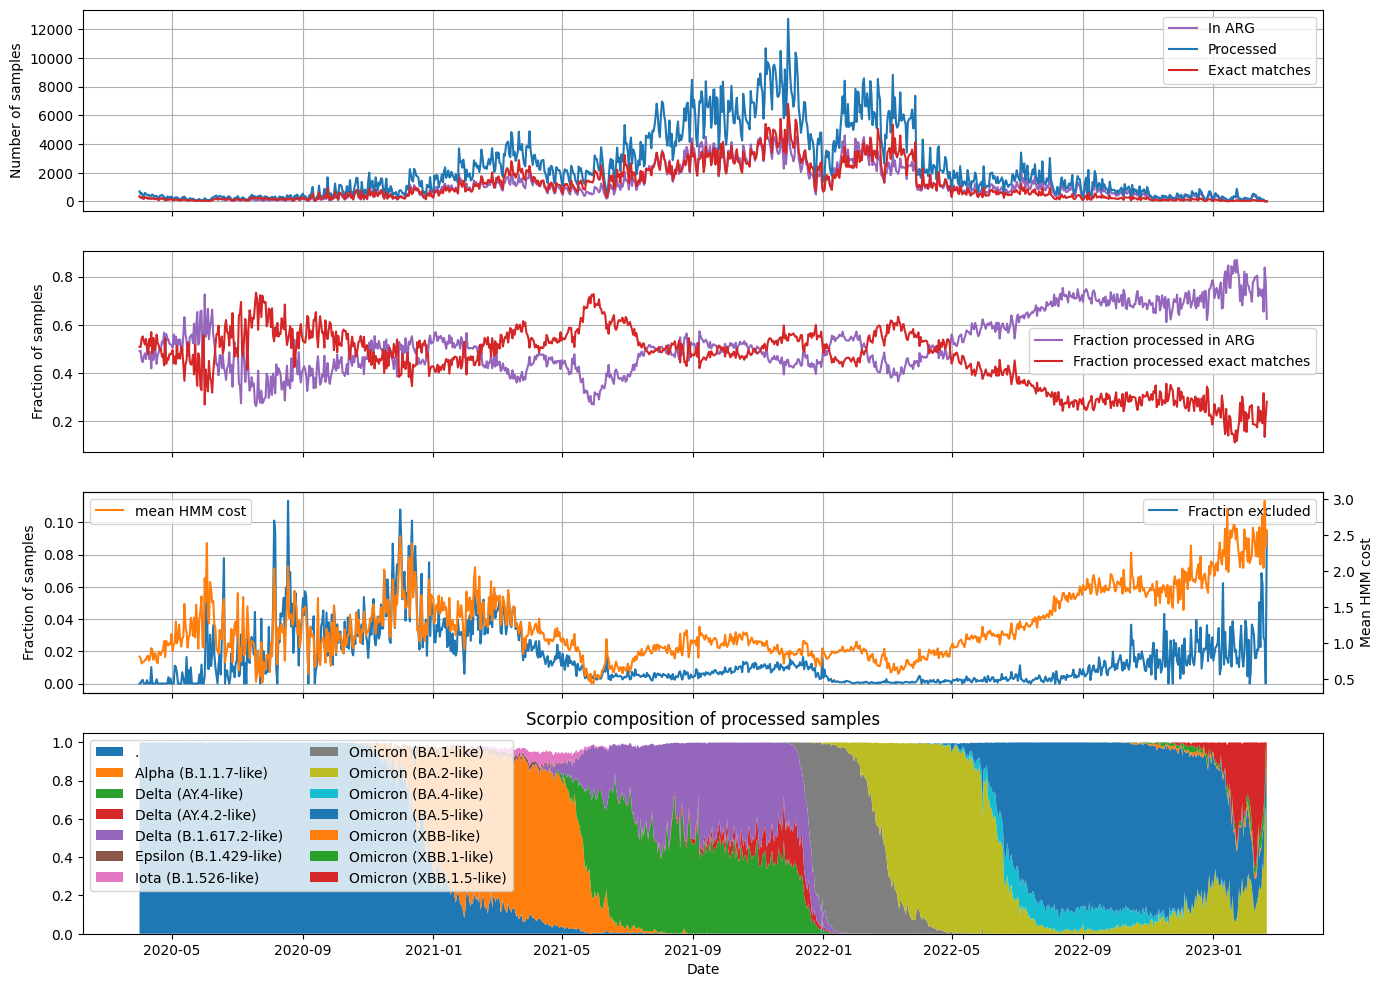

In [24]:
    def _wide_plot(*args, height=4, **kwargs):
        return plt.subplots(*args, figsize=(16, height), **kwargs)

    def plot_samples_per_day(
        df, start_date="2020-01-01", end_date="3000-01-01", scorpio_fraction=0.05
    ):
        df = df[(df.date >= start_date) & (df.date < end_date)]

        dfa = df.groupby("date").sum().reset_index().astype({"date": "datetime64[s]"})
        dfa["mean_hmm_cost"] = dfa["total_hmm_cost"] / dfa["total"]

        fig, (ax1, ax2, ax3, ax4) = _wide_plot(4, height=12, sharex=True)
        exact_col = "tab:red"
        in_col = "tab:purple"
        ax1.plot(dfa.date, dfa.inserted, label="In ARG", color=in_col)
        ax1.plot(dfa.date, dfa.total, label="Processed")
        ax1.plot(dfa.date, dfa.exact_matches, label="Exact matches", color=exact_col)

        ax2.plot(
            dfa.date,
            dfa.inserted / dfa.total,
            label="Fraction processed in ARG",
            color=in_col,
        )
        ax2.plot(
            dfa.date,
            dfa.exact_matches / dfa.total,
            label="Fraction processed exact matches",
            color=exact_col,
        )

        ax3.plot(dfa.date, dfa.rejected / dfa.total, label="Fraction excluded")
        ax3_2 = ax3.twinx()
        ax3_2.plot(
            dfa.date, dfa.mean_hmm_cost, label="mean HMM cost", color="tab:orange"
        )
        ax2.set_ylabel("Fraction of samples")
        ax3.set_ylabel("Fraction of samples")
        ax4.set_xlabel("Date")
        ax3_2.set_ylabel("Mean HMM cost")
        ax1.set_ylabel("Number of samples")
        ax1.legend()
        ax2.legend()
        ax3.legend(loc="upper right")
        ax3_2.legend(loc="upper left")
        for ax in [ax1, ax2, ax3]:
            ax.grid()

        df_scorpio = df.pivot_table(
            columns="scorpio", index="date", values="total", aggfunc="sum", fill_value=0
        ).reset_index()
        # Need force conversion back to datetime here for some reason
        df_scorpio = df_scorpio.astype({"date": "datetime64[s]"}).set_index("date")
        # convert to fractions
        df_scorpio = df_scorpio.divide(df_scorpio.sum(axis="columns"), axis="index")
        # Remove columns that don't have more than the threshold
        keep_cols = []
        first_scorpio_date = []
        for col in df_scorpio:
            if np.any(df_scorpio[col] >= scorpio_fraction):
                keep_cols.append(col)
                

        df_scorpio = df_scorpio[keep_cols]
        ax4.set_title("Scorpio composition of processed samples")
        ax4.stackplot(
            df_scorpio.index,
            *[df_scorpio[s] for s in df_scorpio],
            labels=[" ".join(s.split("_")) for s in df_scorpio],
        )
        ax4.legend(loc="upper left", ncol=2)

        return fig, [ax1, ax2, ax3, ax4]

plot_samples_per_day(df_daily, start_date="2020-04-01");

# Recombinants over time

It seems like a good idea to plot the detection of recombinants over time, along with dataset composition

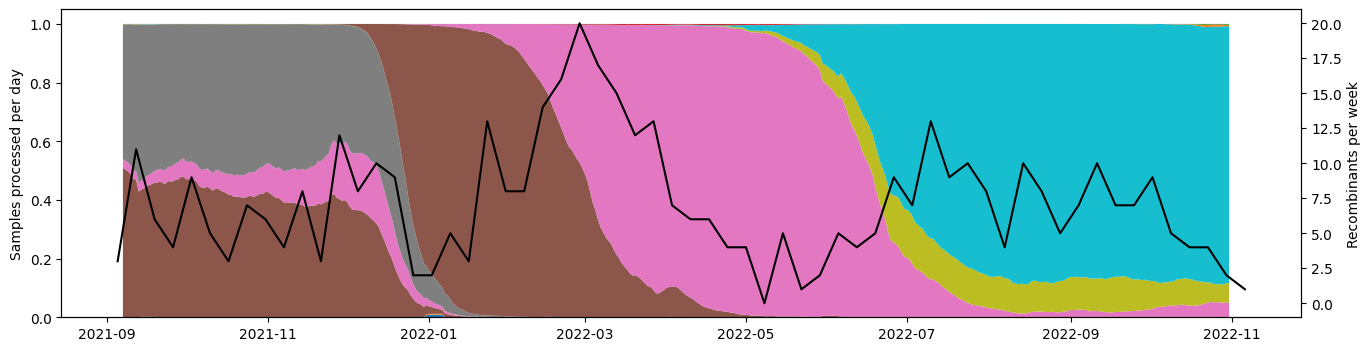

In [95]:
    def plot_recombinants_over_time(
        df_daily, df_recomb, start_date="2020-01-01", end_date="3000-01-01", scorpio_fraction=0.05,
        scorpio_as_fraction=False):

        df_daily = df_daily[(start_date <= df_daily.date) & (df_daily.date < end_date)]
        df_recomb = df_recomb[(start_date <= df_recomb.date_added) & (df_recomb.date_added < end_date)]
        
        fig, ax = _wide_plot(1, height=4)
        df_scorpio = df_daily.pivot_table(
            columns="scorpio", index="date", values="total", aggfunc="sum", fill_value=0
        ).reset_index()
        # Need force conversion back to datetime here for some reason
        df_scorpio = df_scorpio.astype({"date": "datetime64[s]"}).set_index("date")
        # convert to fractions
        df_scorpio_frac = df_scorpio.divide(df_scorpio.sum(axis="columns"), axis="index")
        # Remove columns that don't have more than the threshold
        keep_cols = []
        first_scorpio_date = []
        for col in df_scorpio:
            if np.any(df_scorpio_frac[col] >= scorpio_fraction):
                keep_cols.append(col)
                
        df_scorpio = df_scorpio[keep_cols]
        if scorpio_as_fraction:
            df_scorpio = df_scorpio_frac
        
        ax.set_ylabel("Samples processed per day")
        ax.stackplot(
            df_scorpio.index,
            # Plot on a rolling 7 day mean to smooth a bit.
            *[df_scorpio[s].rolling(7).mean() for s in df_scorpio],
            labels=[" ".join(s.split("_")) for s in df_scorpio],
        )
        ax.legend(loc="upper left", ncol=2)

        ax2 = ax.twinx()
        ax2.set_ylabel("Recombinants per week")
        df = df_recomb.copy().set_index("date_added")
        df["marker"] = np.ones(df.shape[0])
        dfw = df.resample("W").count()
        ax2.plot(dfw.index, dfw.marker, color="black")
       

plot_recombinants_over_time(df_daily, df_recomb[np.logical_not(df_recomb.break_near_missing_run_12_7)], 
                            start_date="2021-09", end_date="2022-11", scorpio_as_fraction=True,
                           scorpio_fraction=0.1)

For reference, looking at the unfiltered recombinants completely changes the picture.

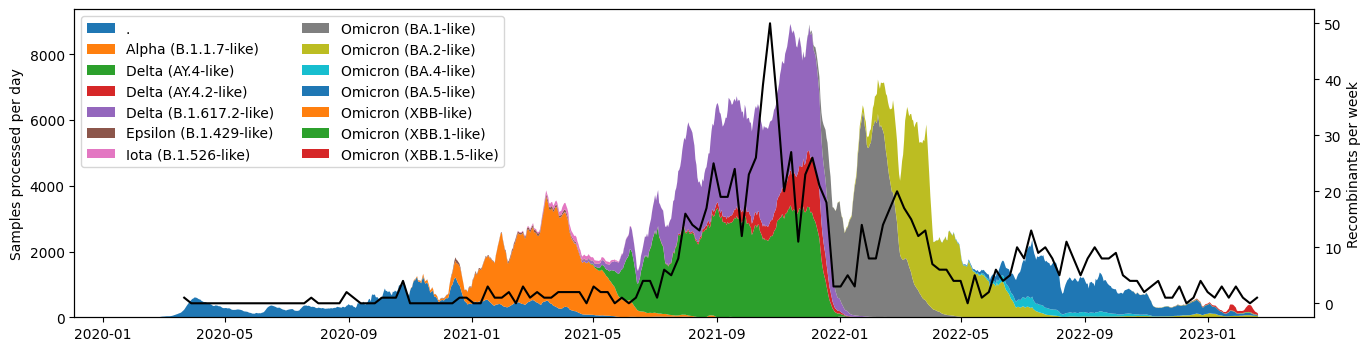

In [71]:
plot_recombinants_over_time(df_daily, df_recomb)

In [72]:
df_recomb[np.logical_not(df_recomb.break_near_missing_run_12_7)]

,recombinant,descendants,sample,sample_id,sample_pango,interval_left,interval_right,num_mutations,date_added,group_id,...,max_run_length,max_runlength_3sep,likely_artifactual,k4_num_mutations,k1000_num_mutations,num_mutations_averted,Viridian_amplicon_scheme,Platform,Artic_primer_version,break_near_missing_run_12_7
0,1530,1,1529,ERR4437465,B.1.157,8783,13617,2,2020-03-22,052b938d3189a1c873abd3ffd894e4c6,...,0,1,False,2,7,5,COVID-ARTIC-V3,ILLUMINA,3,False
1,22500,1,22499,ERR4638271,B.1.1.217,26528,26714,2,2020-07-23,96ae2d6491a4e2d9432c231e6f2bb7a0,...,2,3,False,2,6,4,COVID-ARTIC-V3,ILLUMINA,3,False
2,26465,54,26464,ERR4615866,B.1.221,15325,21855,1,2020-08-24,dccf6a6ff6f85d67cdd5a7e5c0e5d758,...,0,1,False,1,6,5,COVID-ARTIC-V3,ILLUMINA,3,False
3,27003,3,27002,ERR4671078,B.1.160,22993,25563,2,2020-08-26,0c768f9bb44f8c5d4daf59582c6c9a16,...,2,1,False,2,14,12,COVID-ARTIC-V3,OXFORD_NANOPORE,3,False
4,28379,3,28378,SRR21719160,B.1.426,6542,9515,0,2020-09-02,d856a9a4583881e765e24caeb4533948,...,0,1,False,0,4,4,COVID-ARTIC-V3,ILLUMINA,.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1430261,1,1430260,ERR10839848,CH.1.1,19327,20741,2,2023-01-23,d5ca15babe3403d4d5764e614d8cf68f,...,1,1,False,2,16,14,COVID-ARTIC-V4.1,ILLUMINA,4.1alt,False
925,1430452,1,1430451,SRR23358540,CH.1.1,9867,12160,1,2023-01-23,b7c8e0260ee65249105de96d2a5c50e3,...,3,1,False,1,12,11,COVID-ARTIC-V4.1,ILLUMINA,.,False
926,1431988,1,1431987,ERR10931828,CH.1.1,19887,21811,2,2023-01-29,efa2dbff2716ef08d00943f0d5c83395,...,0,1,False,2,6,4,COVID-ARTIC-V4.1,ILLUMINA,4.1alt,False
927,1432902,2,1432901,ERR10921923,BY.1.1,20742,21767,3,2023-02-02,ef73940c5b9a228b0c1ab15502a128dd,...,3,1,False,3,18,15,COVID-ARTIC-V4.1,ILLUMINA,.,False


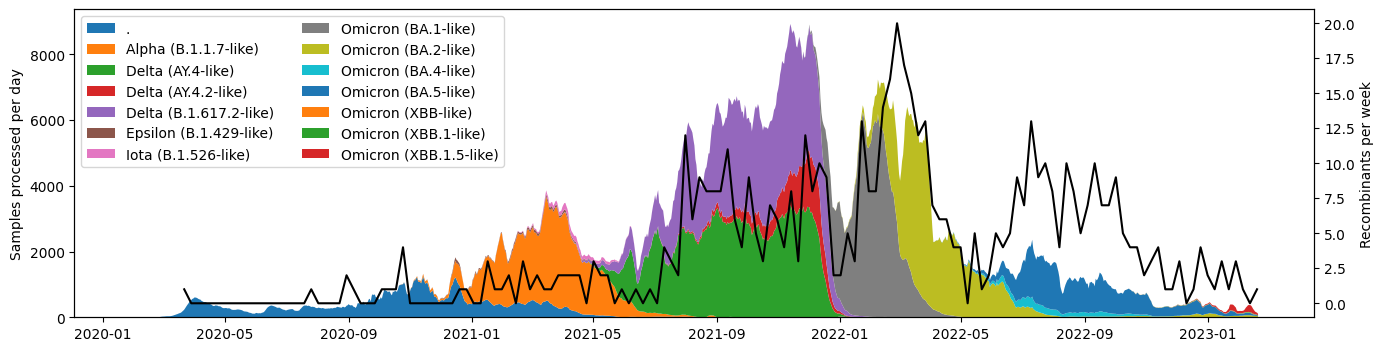

In [82]:
plot_recombinants_over_time(df_daily, df_recomb[np.logical_not(df_recomb.break_near_missing_run_12_7)]) 
                           #scorpio_as_fraction=True, start_date="2021-09")